In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("clinical_data.json", 'r') as file:
    clinical_data = json.load(file)

clinical_data = clinical_data['kf_exams']
clinical_data = [exam for exam in clinical_data if (exam['patient']['ifr']!=None and exam['patient']["exclude"]!=2)]

In [4]:
df = pd.json_normalize(clinical_data)

In [5]:
df.head()

,id,path,key_frame.id,key_frame.identifiers,key_frame.path,key_frame.mask,patient.id,patient.sex,patient.age,patient.ifr,patient.ffr,patient.exclude
0,5,/media/jlsstorage/masstorage/angiograms/Videos...,27,780_29.8_24.6_27_0224_0077,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,780,0.0,57.0,0.97,NaN,0.0
1,8,/media/jlsstorage/masstorage/angiograms/Videos...,38,774_29.8_-1.6_38_0328_0077,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,774,0.0,77.0,0.77,NaN,0.0
2,5,/media/jlsstorage/masstorage/angiograms/Videos...,25,760_-1.9_-25.3_25_0614_0076,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,760,0.0,66.0,0.94,NaN,0.0
3,8,/media/jlsstorage/masstorage/angiograms/Videos...,32,610_32_16_32_1520_0097,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,610,1.0,58.0,0.94,NaN,0.0
4,9,/media/jlsstorage/masstorage/angiograms/Videos...,28,763_-32.8_4.2_28_0579_0064,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,763,0.0,68.0,0.65,NaN,0.0


In [6]:
df.describe()

,key_frame.id,patient.id,patient.sex,patient.age,patient.ifr,patient.ffr,patient.exclude
count,412.000000,412.000000,412.000000,412.000000,412.000000,45.000000,412.000000
mean,31.405340,651.815534,0.235437,68.036408,0.889248,0.817333,0.036408
std,23.757765,111.163784,0.424787,9.856693,0.105252,0.061806,0.187530
min,10.000000,255.000000,0.000000,46.000000,0.490000,0.710000,0.000000
25%,24.000000,600.000000,0.000000,64.000000,0.860000,0.760000,0.000000
50%,30.000000,618.000000,0.000000,68.000000,0.920000,0.810000,0.000000
75%,35.000000,769.000000,0.000000,76.000000,0.940000,0.860000,0.000000
max,480.000000,790.000000,1.000000,88.000000,1.000000,0.920000,1.000000


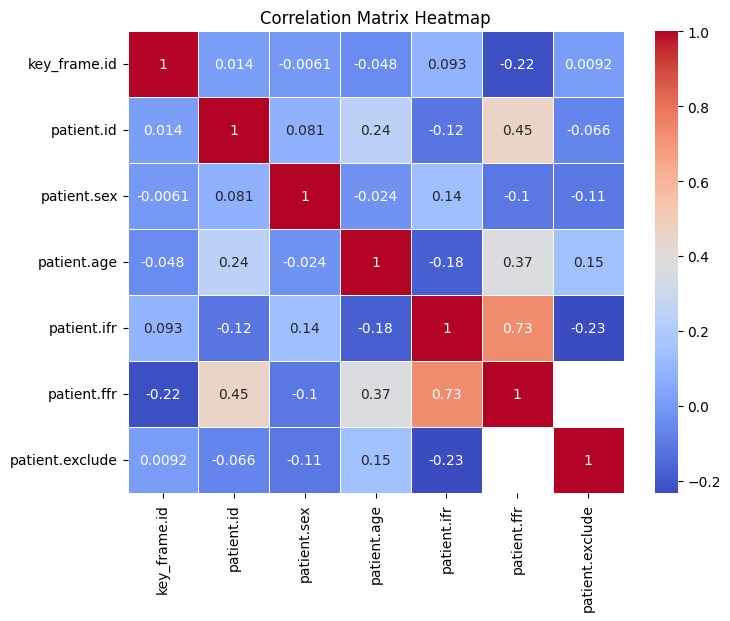

In [7]:
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
sum(df["key_frame.id"]>45)

15